# Explore LFP Data

## Set-up

In [1]:
# add import here

# general
from scipy.io import loadmat
# from neo.io import NixIO
import matplotlib.pyplot as plt
import numpy as np

# lab imports
from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum

from fooof import FOOOF
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model

ModuleNotFoundError: No module named 'neurodsp'

In [31]:
# settings
PATH = "C:/Users/micha/V1_v4_1024_electrode_resting_state_data"
FS = 500 # sampling frequency (Hz)
CHAN = 3 # example channel

In [32]:
# load data
data_in = loadmat(PATH + '/data/A_SNR_140819/LFP/NSP1_array2_LFP.mat')
print(data_in.keys())

# get lfp data 
lfp = data_in['lfp']

# create time-vector
n_seconds = lfp.shape[0]/FS
time = create_times(n_seconds, FS)
print(time.shape)

# show
print(lfp.shape)
print(f"N channels: \t\t{lfp.shape[1]}")
print(f"Signal duration: \t{n_seconds} (s)")

dict_keys(['__header__', '__version__', '__globals__', 'lfp', 'channel_names', 'channel_ids', 'file_origin', 'connector_ID', 'connector_pinID', 'nev_dig_factor', 'nb_sorted_units', 'nev_hi_freq_order', 'nev_hi_freq_type', 'nev_lo_freq_order', 'nev_lo_freq_type', 'nsx_hi_freq_order', 'nsx_lo_freq_order', 'nsx_hi_freq_type', 'nsx_lo_freq_type', 'description', 'nsx', 'Electrode_ID', 'NSP_ID', 'within_NSP_electrode_ID', 'Array_ID', 'within_array_electrode_ID', 'cortical_area', 'schematic_X_position', 'schematic_Y_position'])
(147110,)
(147110, 64)
N channels: 		64
Signal duration: 	294.22 (s)


## Spectral Analysis

(147110,)


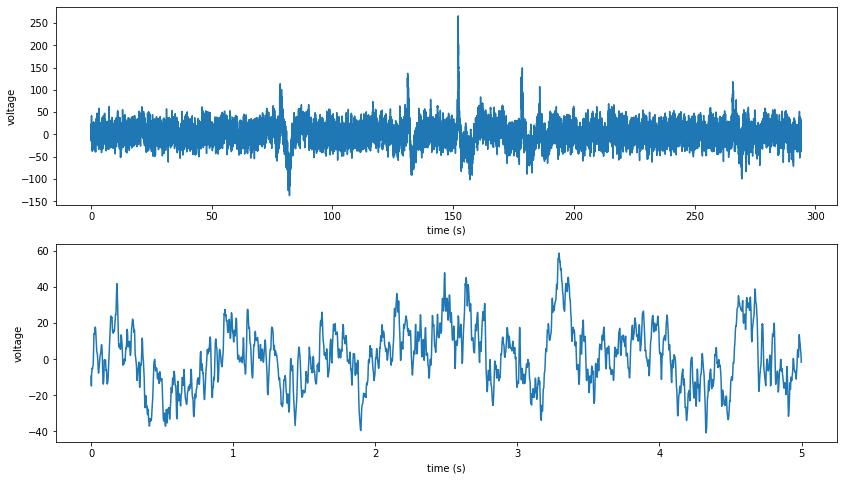

In [33]:
# get signal for an example channel
signal = lfp[:,CHAN]
print(signal.shape)

# plot example signal
fig, (ax1, ax2) = plt.subplots(2,1, figsize=[14,8])
ax1.plot(time, signal)

# plot snippet of signal
time2plot = 5 # sec
ax2.plot(time[:time2plot*FS], signal[:time2plot*FS])

# label plots
for ax in [ax1, ax2]:
    ax.set(xlabel='time (s)', ylabel='voltage')


In [34]:
def plot_signal_and_power(time, signal, freq, spectrum, title='', logscale=False, xlims=None):
    '''
    Plot time-series and corresponding power spectum

    Parameters
    ----------
    time : 1D array, float
        time-vector for signal
    signal : 1D array, float
        time-series e.g. LFP or EEG
    freq : 1D array, float
        frequency-vector for spectrum
    spectrum : 1D array, float
        power spectrum of signal
    title : str, optional
        figure title. The default is ''.
    logscale : bool, optional
        whether to plot the spectrum in log-log space. The default is False.
    xlims : 1D array (len=2), optional
        x-axis limits for time-series plot ([lower_limit, upper_limit]). 
        The default is None.

    '''
    # create figure
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=[12,4], gridspec_kw={'width_ratios': [3, 1]}, constrained_layout=True)
    fig.suptitle(title)

    # plot signal
    ax1.set(xlabel='time (s)', ylabel='voltage (au)', title='Time-series')
    ax1.plot(time, signal)
    if xlims:
        ax1.set_xlim(xlims)
        
    # plot spectra
    ax2.set(xlabel='frequency (Hz)', ylabel='power (au)', title='Power Spectral Density')
    ax2.plot(freq, spectrum);
    ax2.set_xlim([.1,200])
    if logscale:
        ax2.set(xscale='log', yscale='log')

    

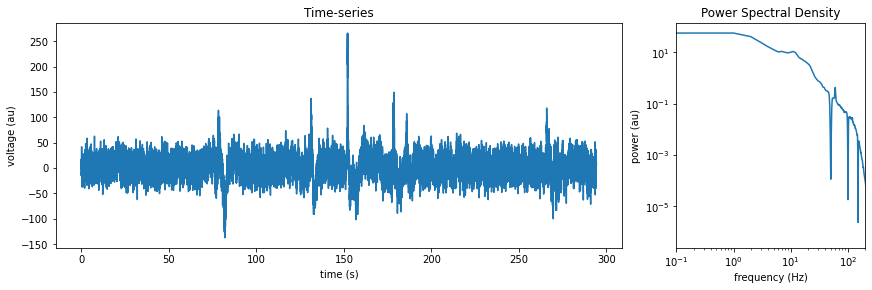

In [35]:
# compute power spectrum
freq, psd = compute_spectrum(signal, FS)

# plot
plot_signal_and_power(time, signal, freq, psd, logscale=True)

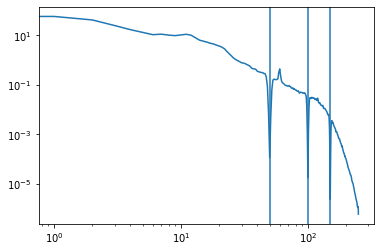

In [36]:
# examine pre-processing (band-pass )
fig, ax = plt.subplots()
ax.loglog(freq, psd)
ax.axvline(50)
ax.axvline(100)
ax.axvline(150)

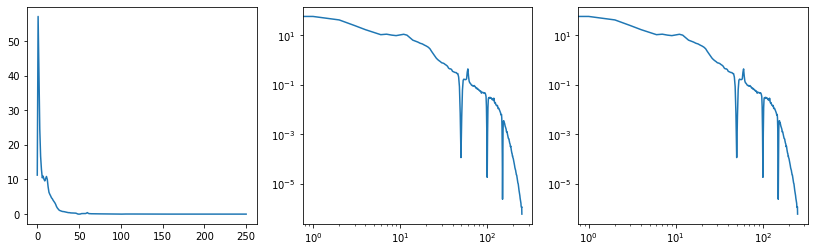

In [37]:
# log plotting explanation
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[14,4])

ax1.plot(freq, psd)

ax2.plot(freq, psd)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3.loglog(freq, psd)


## Spectral Parameterization

In [38]:
# compute power spectrum
freq, psd = compute_spectrum(signal, FS, f_range=[1,45])

In [42]:
# parameterize
fm = FOOOF(min_peak_height=0.05, aperiodic_mode='knee', peak_threshold=2)
fm.fit(freq, psd)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



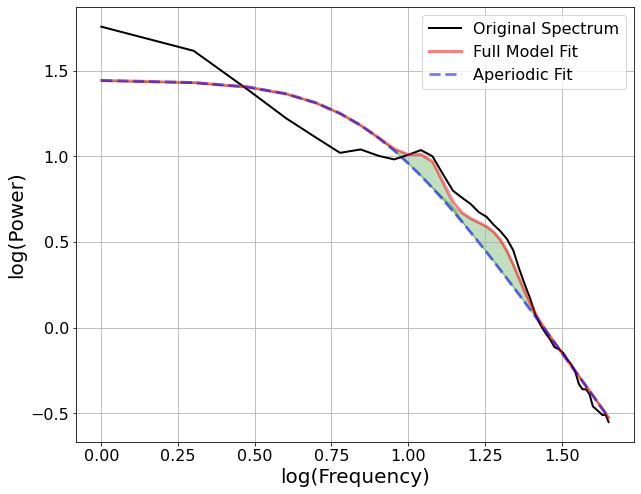

In [45]:
# plot specparam results
fm.plot(plot_peaks='shade', plt_log=True)
# fm.plot(plt_log=True)

In [44]:
fm.print_results()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 45 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     3.6582, 163.3525, 2.5274                                     
                                                                                                  
                                       2 peaks were found:                                        
          

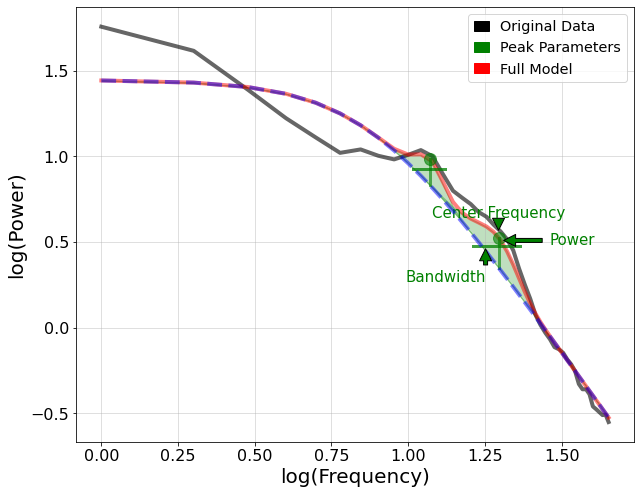

In [51]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm, annotate_aperiodic=False, plt_log=True)

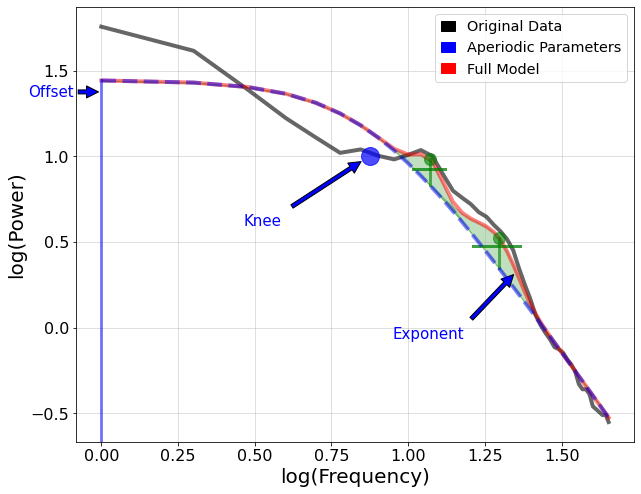

In [50]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm, annotate_peaks=False, plt_log=True)